In [1]:
import os

folder = os.path.join('/', 'Users', 'snair', 'works', 'go', 'src', 'github.com', 'sreeja', 'etcd-exp')


In [2]:
# data processing

def get_time(line):
    parts = line.strip().split(':')
    try:
        int(parts[1].strip()[-2])
    except ValueError:
        time_part = parts[1].strip()[:-2]
        unit_part = parts[1].strip()[-2:]
        if unit_part == 'ms':
            return float(time_part)
        if unit_part == 'ns':
            return float(time_part) * 1000000
        if unit_part == 'µs':
            return float(time_part) * 1000
        else:
            raise Exception('unhandled unit', line)

    time_part = parts[1].strip()[:-1]
    unit_part = parts[1].strip()[-1:]
    if unit_part == 's':
        return float(time_part) / 1000.0
    else:
        raise Exception('unhandled unit', line)



def get_data(folder):
    result = {}
    for i in range(1,6):
        if os.path.isfile(os.path.join(folder, 'log'+str(i)+'.txt')):
            with open(os.path.join(folder, 'log'+str(i)+'.txt')) as f:
                result[str(i)+'read-acquire'] = []
                result[str(i)+'read-release'] = []
                result[str(i)+'write-acquire'] = []
                result[str(i)+'write-release'] = []
                for line in f.readlines():
                    if line.strip().startswith('time to acquire read lock :'):
                        time = get_time(line)
                        result[str(i)+'read-acquire'] += [time]
                    elif line.strip().startswith('time to release read lock :'):
                        time = get_time(line)
                        result[str(i)+'read-release'] += [time]
                    elif line.strip().startswith('time to acquire lock:'):
                        time = get_time(line)
                        result[str(i)+'write-acquire'] += [time]
                    elif line.strip().startswith('time to release lock:'):
                        time = get_time(line)
                        result[str(i)+'write-release'] += [time]
                        
    return result


In [3]:
def get_log(folder):
    result = {}
    if os.path.isfile(os.path.join(folder, 'log.txt')):
        with open(os.path.join(folder, 'log.txt')) as f:
            result['read-acquire'] = []
            result['read-release'] = []
            result['write-acquire'] = []
            result['write-release'] = []
            for line in f.readlines():
                if line.strip().startswith('time to acquire read lock :'):
                    time = get_time(line)
                    result['read-acquire'] += [time]
                elif line.strip().startswith('time to release read lock :'):
                    time = get_time(line)
                    result['read-release'] += [time]
                elif line.strip().startswith('time to acquire lock:'):
                    time = get_time(line)
                    result['write-acquire'] += [time]
                elif line.strip().startswith('time to release lock:'):
                    time = get_time(line)
                    result['write-release'] += [time]
                        
    return result


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def generate_plots(data, name=''):
    fig, ax = plt.subplots(figsize=(14,8))
    x_pos = np.arange(len(data))
    for d in data:
        for val in data[d]:
            ax.plot(d, val, 'x', color='blue')
        
    plt.xticks(rotation=90)
    plt.grid(axis='y')
#     plt.savefig(name2+'/raw'+name1+'.png')
#     plt.savefig(name2+'/raw'+name1+'.eps', format='eps')
    plt.show()

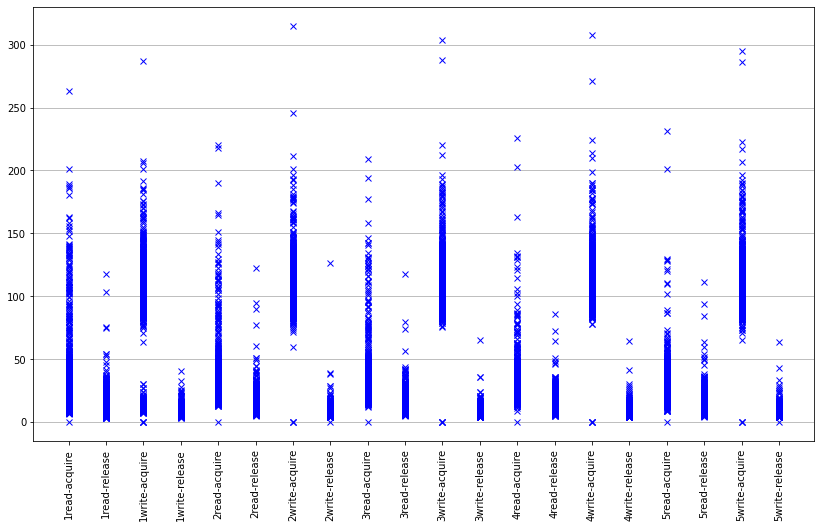

In [5]:
data = get_data(folder)
generate_plots(data)

In [6]:
for d in data:
    print(d)
    print('99th:', np.percentile(data[d],99),'95th', np.percentile(data[d],95),'90th', np.percentile(data[d],90),'50th', np.percentile(data[d],50))

1read-acquire
99th: 137.39680835000001 95th 70.72764064999993 90th 41.29713960000001 50th 16.504123
1read-release
99th: 33.77020929 95th 22.227164599999995 90th 18.3368568 50th 7.501024
1write-acquire
99th: 163.01642965 95th 131.60299569999998 90th 124.89271280000001 50th 16.698897000000002
1write-release
99th: 15.467252180000001 95th 11.214677349999995 90th 9.703355100000001 50th 6.104472
2read-acquire
99th: 133.754372 95th 82.083673 90th 49.683054 50th 27.597667
2read-release
99th: 41.347265 95th 26.332971 90th 20.737035 50th 12.96454
2write-acquire
99th: 179.286652 95th 140.976778 90th 133.916267 50th 112.924422
2write-release
99th: 20.505355 95th 12.822137 90th 11.048469 50th 7.067065
3read-acquire
99th: 130.401732 95th 75.046608 90th 48.654364 50th 27.416665
3read-release
99th: 40.596184 95th 26.170509 90th 21.992556 50th 13.084951
3write-acquire
99th: 183.474139 95th 144.68502 90th 134.043615 50th 113.560075
3write-release
99th: 18.604133 95th 12.766124 90th 11.196258 50th 7.0089

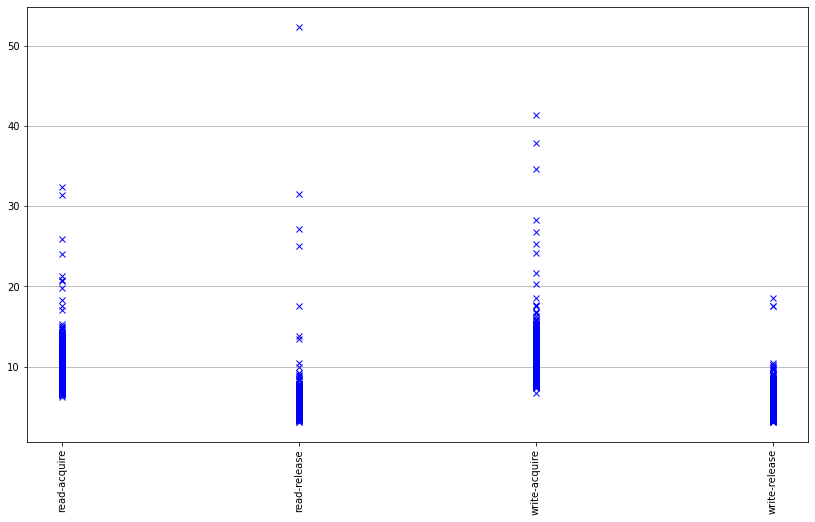

In [7]:
data = get_log(folder)
generate_plots(data)

In [8]:
for d in data:
    print(d)
    print('99th:', np.percentile(data[d],99),'95th', np.percentile(data[d],95),'90th', np.percentile(data[d],90),'50th', np.percentile(data[d],50))

read-acquire
99th: 17.088699 95th 12.743522 90th 11.737599 50th 9.06263
read-release
99th: 9.155885 95th 7.059484 90th 6.465039 50th 4.774718
write-acquire
99th: 17.74352 95th 14.185205 90th 12.94429 50th 10.077105
write-release
99th: 9.533844 95th 7.597998 90th 6.875759 50th 4.981449
